In [1]:
import pandas as pd
import numpy as np
import random
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

#### Lectura dataset

In [2]:
df = pd.read_csv('airbnb_madrid_13k.csv', delimiter=';')
df

/var/folders/dp/3wz4p2396y7dbvtcqv838qz40000gn/T/ipykernel_3540/4041469592.py:1: DtypeWarning: Columns (40) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('airbnb_madrid_13k.csv', delimiter=';')


,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,...,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
0,6771751,https://www.airbnb.com/rooms/6771751,20170407214119,2017-04-08,HABITACIÓN AGOSTO,El piso dispone de 4 habitaciones (de las cual...,"las habitaciones son grandes, 2 exteriores y 2...",El piso dispone de 4 habitaciones (de las cual...,none,NaN,...,NaN,NaN,NaN,NaN,NaN,flexible,1,NaN,"40.41099192059709, -3.7084124358092114","Host Has Profile Pic,Is Location Exact,Require..."
1,15232455,https://www.airbnb.com/rooms/15232455,20170407214119,2017-04-08,MADRID CENTRO /NICE FLAT,"Lugares de interés: CaixaForum Madrid, Teatro ...","Zona céntrica. Cerca de bares,restaurantes. C...","Lugares de interés: CaixaForum Madrid, Teatro ...",none,Plaza Tirso de Molina es un espacio público ...,...,9.0,10.0,8.0,NaN,NaN,moderate,4,3.20,"40.40982700358377, -3.7041135477674585","Host Has Profile Pic,Host Identity Verified,Is..."
2,10768881,https://www.airbnb.com/rooms/10768881,20170407214119,2017-04-08,HABITACIÓN CON SALITA,Alojamiento en casa particular pequeña y muy a...,"Casa pequeña, acogedora, ubicada en una corral...",Alojamiento en casa particular pequeña y muy a...,none,Barrio multicultural. Bien comunicado. Parques...,...,10.0,10.0,9.0,NaN,NaN,moderate,1,4.58,"40.449351840583134, -3.7043372557773404","Host Has Profile Pic,Is Location Exact,Require..."
3,13537833,https://www.airbnb.com/rooms/13537833,20170407214119,2017-04-08,Cozy room in Madrid city! few nights or wknds.,The room has got high quality pillows and matt...,It´s got wooden floor,The room has got high quality pillows and matt...,none,This street makes you feel like if you were in...,...,9.0,10.0,9.0,NaN,NaN,flexible,1,1.34,"40.448421065949354, -3.7020784706730288","Host Has Profile Pic,Is Location Exact,Require..."
4,3531547,https://www.airbnb.com/rooms/3531547,20170407214119,2017-04-08,Dúplex coqueto en la zona de Goya.,El apartamento es un dúplex luminoso a tan sól...,"Calm and quiet place, without any outdoors noise.","Calm and quiet place, without any outdoors noi...",none,There´s a market on the doorstep. Many large s...,...,10.0,10.0,9.0,NaN,NaN,moderate,1,2.93,"40.425167740387415, -3.672521180333406","Host Has Profile Pic,Host Identity Verified,Is..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13202,15210056,https://www.airbnb.com/rooms/15210056,20170407214119,2017-04-08,"Madrid Centro,precioso apt en el corazón de ma...","Lugares de interés: Museo Reina Sofia, Estacio...","Está recién reformado! Es un piso acogedor, co...","Lugares de interés: Museo Reina Sofia, Estacio...",none,Que puedes ir caminando a todos los sitios más...,...,10.0,9.0,9.0,NaN,NaN,moderate,1,2.41,"40.4112723598657, -3.6976994898201725","Host Has Profile Pic,Is Location Exact,Require..."
13203,3248443,https://www.airbnb.com/rooms/3248443,20170407214119,2017-04-08,Habitación con baño propio.Single room suite bath,Lugares de interés: transporte público y parqu...,NaN,Lugares de interés: transporte público y parqu...,none,NaN,...,NaN,NaN,NaN,NaN,NaN,flexible,2,0.11,"40.391848274460166, -3.6534731981133293","Host Has Profile Pic,Requires License"
13204,11515073,https://www.airbnb.com/rooms/11515073,20170407214119,2017-04-08,Nice&Cheap Near Metro TwinBed,"Cozy room with bunk bed, close to Oporto Metro...","Our place is a cozy, lightly and quiet, where ...","Cozy room with bunk bed, close to Oporto Metro...",none,NaN,...,10.0,9.0,9.0,NaN,NaN,moderate,1,0.55,"40.389908833795516, -3.7283526639598206","Host Has Profile Pic,Host Identity Verified,Is..."
13205,15898112,https://www.airbnb.com/rooms/15898112,20170407214119,2017-04-08,Habitación privada cercana al aeropuerto,"Lugares de interés: Actividades en familia, Pa...",NaN,"Lugares de interés: Actividades e

In [3]:
df['Bed Type'].unique()

array(['Real Bed', 'Pull-out Sofa', 'Airbed', 'Couch', 'Futon'],
      dtype=object)

#### Selección de las columnas

In [4]:
columnas_seleccionadas = ['ID','Neighbourhood Cleansed','Neighbourhood Group Cleansed','City','Country Code','Country','Latitude','Longitude','Property Type','Room Type',
						  'Accommodates','Bathrooms','Bedrooms','Beds','Bed Type','Price','Guests Included','Extra People','Minimum Nights','Maximum Nights','Number of Reviews',
						  'Review Scores Rating','Review Scores Accuracy','Review Scores Cleanliness','Review Scores Checkin','Review Scores Communication','Review Scores Location',
						  'Review Scores Value','Cancellation Policy']

In [5]:
df = df[columnas_seleccionadas]
df

,ID,Neighbourhood Cleansed,Neighbourhood Group Cleansed,City,Country Code,Country,Latitude,Longitude,Property Type,Room Type,...,Maximum Nights,Number of Reviews,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Cancellation Policy
0,6771751,Embajadores,Centro,Madrid,ES,Spain,40.410992,-3.708412,Apartment,Private room,...,1125,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,flexible
1,15232455,Embajadores,Centro,Madrid,ES,Spain,40.409827,-3.704114,Condominium,Entire home/apt,...,1000,19,77.0,9.0,8.0,9.0,9.0,10.0,8.0,moderate
2,10768881,Bellas Vistas,Tetuán,Madrid,ES,Spain,40.449352,-3.704337,Apartment,Private room,...,1125,58,92.0,10.0,9.0,10.0,10.0,10.0,9.0,moderate
3,13537833,Cuatro Caminos,Tetuán,Madrid,ES,Spain,40.448421,-3.702078,Apartment,Private room,...,5,13,85.0,9.0,9.0,10.0,9.0,10.0,9.0,flexible
4,3531547,Goya,Salamanca,Madrid,ES,Spain,40.425168,-3.672521,Apartment,Entire home/apt,...,1125,94,82.0,9.0,7.0,10.0,10.0,10.0,9.0,moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13202,15210056,Embajadores,Centro,Madrid,ES,Spain,40.411272,-3.697699,Apartment,Entire home/apt,...,90,15,91.0,10.0,10.0,10.0,10.0,9.0,9.0,moderate
13203,3248443,Portazgo,Puente de Vallecas,Madrid,ES,Spain,40.391848,-3.653473,House,Private room,...,1125,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,flexible
13204,11515073,Opañel,Carabanchel,Madrid,ES,Spain,40.389909,-3.728353,Apartment,Private room,...,4,7,97.0,10.0,10.0,10.0,10.0,9.0,9.0,moderate
13205,15898112,Ambroz,Vicálvaro,Madrid,ES,Spain,40.408942,-3.612687,Apartment,Private room,...,30,6,97.0,10.0,10.0,10.0,10.0,9.0,9.0,flexible


#### Eliminación de valores nulos

In [6]:
df = df.dropna()
df

,ID,Neighbourhood Cleansed,Neighbourhood Group Cleansed,City,Country Code,Country,Latitude,Longitude,Property Type,Room Type,...,Maximum Nights,Number of Reviews,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Cancellation Policy
1,15232455,Embajadores,Centro,Madrid,ES,Spain,40.409827,-3.704114,Condominium,Entire home/apt,...,1000,19,77.0,9.0,8.0,9.0,9.0,10.0,8.0,moderate
2,10768881,Bellas Vistas,Tetuán,Madrid,ES,Spain,40.449352,-3.704337,Apartment,Private room,...,1125,58,92.0,10.0,9.0,10.0,10.0,10.0,9.0,moderate
3,13537833,Cuatro Caminos,Tetuán,Madrid,ES,Spain,40.448421,-3.702078,Apartment,Private room,...,5,13,85.0,9.0,9.0,10.0,9.0,10.0,9.0,flexible
4,3531547,Goya,Salamanca,Madrid,ES,Spain,40.425168,-3.672521,Apartment,Entire home/apt,...,1125,94,82.0,9.0,7.0,10.0,10.0,10.0,9.0,moderate
5,11436094,Almagro,Chamberí,Madrid,ES,Spain,40.435176,-3.690953,Apartment,Entire home/apt,...,1125,11,96.0,10.0,10.0,10.0,10.0,10.0,9.0,moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13200,16248774,Guindalera,Salamanca,Madrid,ES,Spain,40.430951,-3.662865,Apartment,Entire home/apt,...,1125,3,100.0,10.0,10.0,10.0,10.0,10.0,10.0,moderate
13201,8894850,Embajadores,Centro,Madrid,ES,Spain,40.410117,-3.704624,Apartment,Entire home/apt,...,1125,13,97.0,10.0,10.0,10.0,10.0,10.0,10.0,moderate
13202,15210056,Embajadores,Centro,Madrid,ES,Spain,40.411272,-3.697699,Apartment,Entire home/apt,...,90,15,91.0,10.0,10.0,10.0,10.0,9.0,9.0,moderate
13204,11515073,Opañel,Carabanchel,Madrid,ES,Spain,40.389909,-3.728353,Apartment,Private room,...,4,7,97.0,10.0,10.0,10.0,10.0,9.0,9.0,moderate


#### Verificación

In [7]:
valores_nulos_totales = df.isnull().sum()

total_valores_nulos = valores_nulos_totales.sum()

if total_valores_nulos == 0:
    print("No hay valores nulos en el DataFrame.")
else:
    print("Hay valores nulos en el DataFrame.")
    print(valores_nulos_totales)

No hay valores nulos en el DataFrame.


In [8]:
df.dtypes

ID                                int64
Neighbourhood Cleansed           object
Neighbourhood Group Cleansed     object
City                             object
Country Code                     object
Country                          object
Latitude                        float64
Longitude                       float64
Property Type                    object
Room Type                        object
Accommodates                      int64
Bathrooms                       float64
Bedrooms                        float64
Beds                            float64
Bed Type                         object
Price                           float64
Guests Included                   int64
Extra People                      int64
Minimum Nights                    int64
Maximum Nights                    int64
Number of Reviews                 int64
Review Scores Rating            float64
Review Scores Accuracy          float64
Review Scores Cleanliness       float64
Review Scores Checkin           float64


#### Cambiamos a tipo int las columnas seleccionadas

In [9]:
df[['Bathrooms', 'Bedrooms', 'Beds', 'Price', 'Review Scores Rating',
	 'Review Scores Accuracy', 'Review Scores Cleanliness',
	   'Review Scores Checkin','Review Scores Communication',
		 'Review Scores Location', 'Review Scores Value']] = df[['Bathrooms', 'Bedrooms', 'Beds', 'Price', 'Review Scores Rating',
																						  'Review Scores Accuracy', 'Review Scores Cleanliness', 'Review Scores Checkin',
																						    'Review Scores Communication', 'Review Scores Location', 'Review Scores Value']].astype(int)

/var/folders/dp/3wz4p2396y7dbvtcqv838qz40000gn/T/ipykernel_3540/2308822373.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['Bathrooms', 'Bedrooms', 'Beds', 'Price', 'Review Scores Rating',


In [10]:
df.dtypes
#Verificamos que el cambio de tipo se ha hecho correctamente

ID                                int64
Neighbourhood Cleansed           object
Neighbourhood Group Cleansed     object
City                             object
Country Code                     object
Country                          object
Latitude                        float64
Longitude                       float64
Property Type                    object
Room Type                        object
Accommodates                      int64
Bathrooms                         int64
Bedrooms                          int64
Beds                              int64
Bed Type                         object
Price                             int64
Guests Included                   int64
Extra People                      int64
Minimum Nights                    int64
Maximum Nights                    int64
Number of Reviews                 int64
Review Scores Rating              int64
Review Scores Accuracy            int64
Review Scores Cleanliness         int64
Review Scores Checkin             int64


#### Exportamos el nuevo df en formato CSV

In [11]:
#df.to_csv('airbnb_13k_clean_date.csv', index=False)

#### **Estudio EDA**

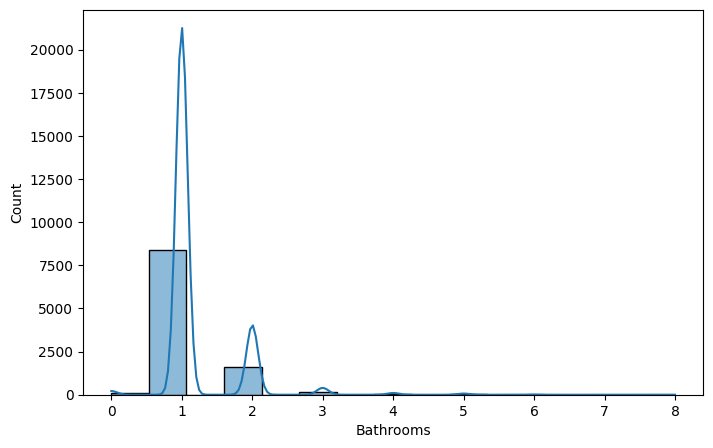

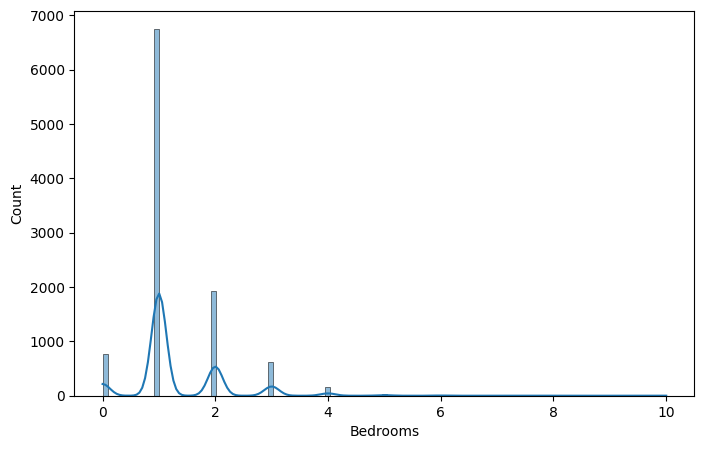

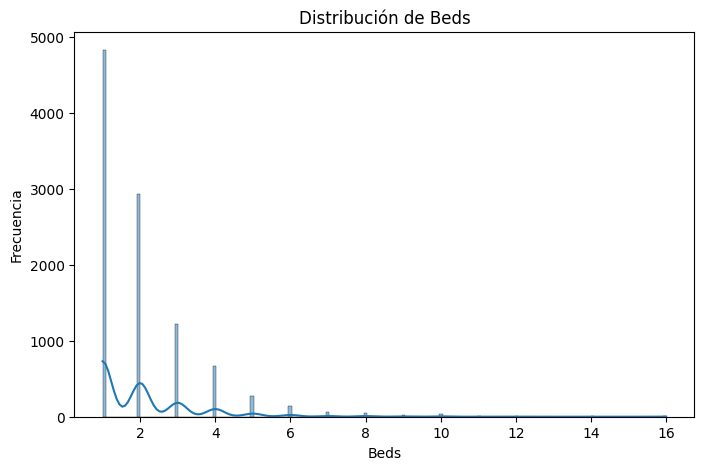

In [12]:
#Vamos a hacer una visualicación de variables numéricas
var_num = ['Bathrooms', 'Bedrooms', 'Beds']
for col in var_num:
	plt.figure(figsize=(8,5))
	sns.histplot(df[col], kde=True)
plt.title(f'Distribución de {col}')
plt.xlabel(col)
plt.ylabel('Frecuencia')
plt.show()

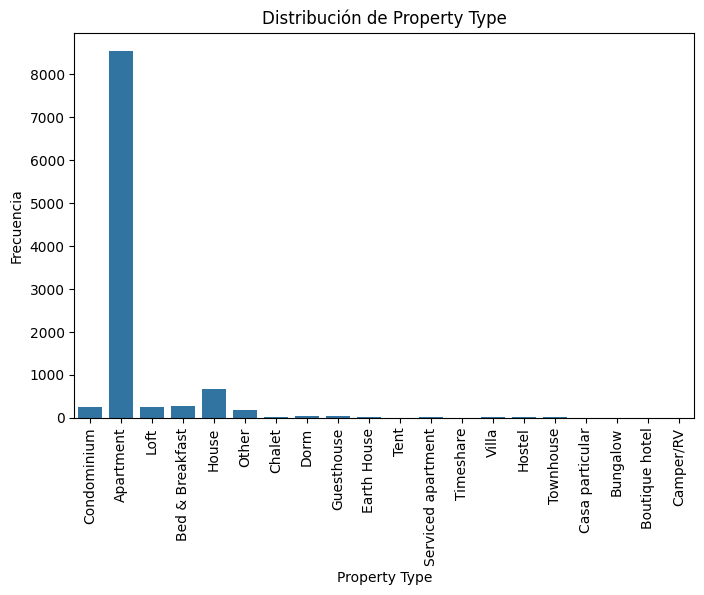

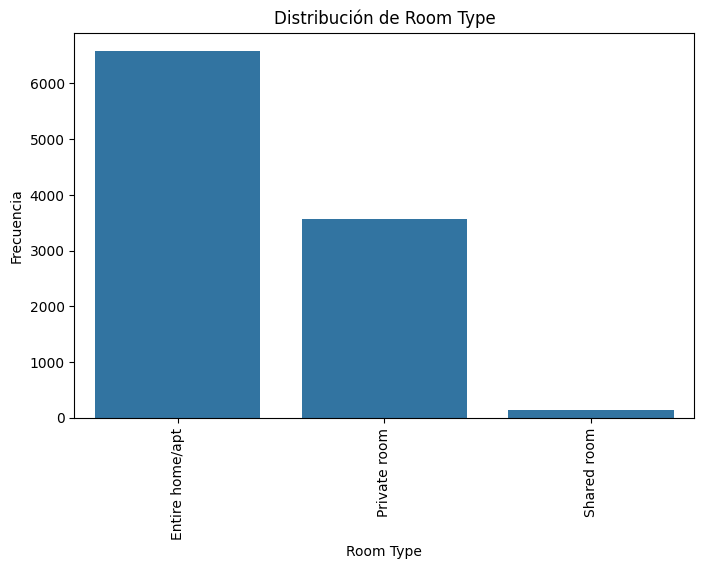

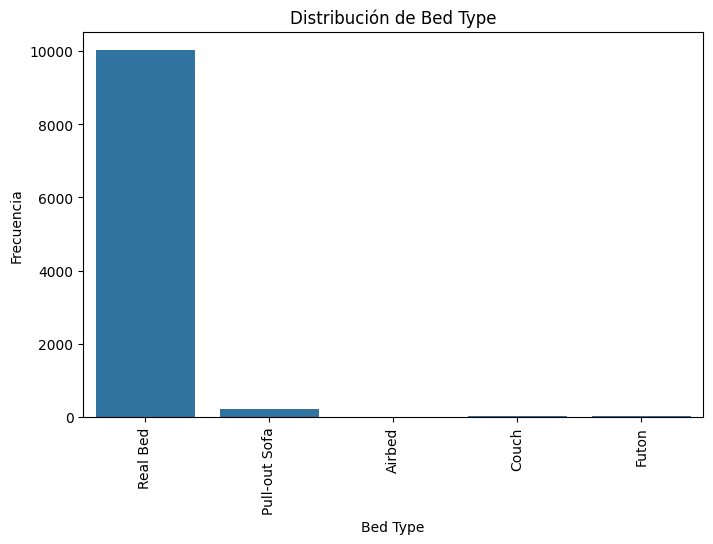

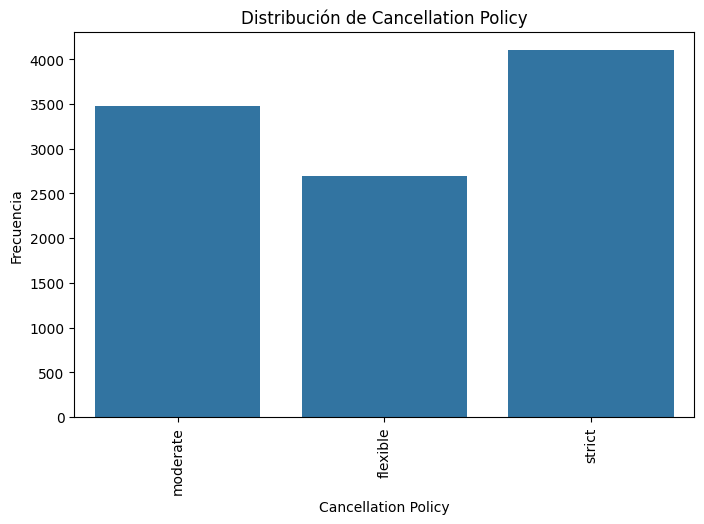

In [13]:
# Visualización de variables categóricas
categorical_cols = ['Property Type', 'Room Type', 'Bed Type', 'Cancellation Policy']
for col in categorical_cols:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df, x=col)
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.xticks(rotation=90)
    plt.show()

#### Top 5 tipos de alojamiento

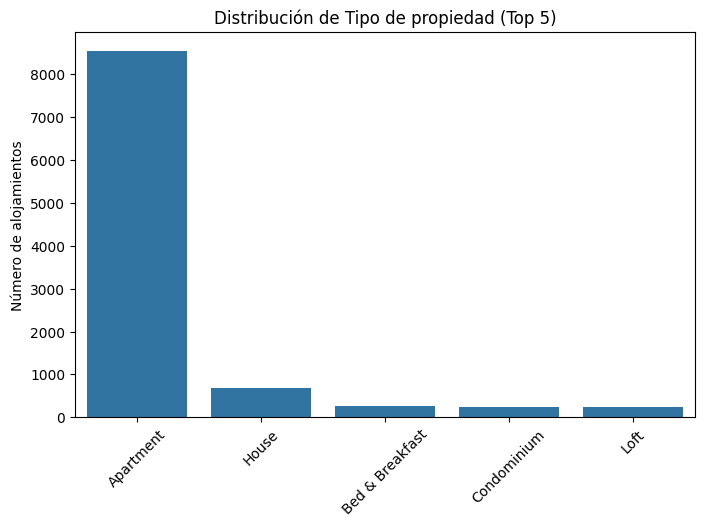

In [14]:
top_property_types = df['Property Type'].value_counts().head(5).index.tolist()

#Filtramos el df para incluir solo los 5 principales valores de 'Tipo de propiedad'
df_top_property = df[df['Property Type'].isin(top_property_types)]

#Visualización
plt.figure(figsize=(8, 5))
sns.countplot(data=df_top_property, x='Property Type', order=top_property_types)
plt.title('Distribución de Tipo de propiedad (Top 5)')
plt.ylabel('Número de alojamientos')
plt.xlabel('')
plt.xticks(rotation=45)
plt.show()
#Podemos ver que de entre todos los tipos de propiedades, el más común y con diferencia es el apartamento
#Por ello el estudio se centrará en apartamentos


#### Precio por noche por tipo de alojamiento

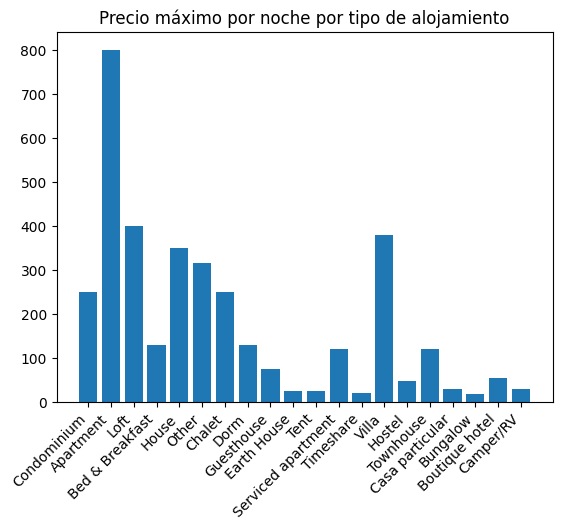

In [15]:
plt.bar(df['Property Type'],df['Price'])
plt.xticks(rotation=45, ha='right')
plt.title('Precio máximo por noche por tipo de alojamiento')
plt.show()
#Puede ayudarnos a tener una idea general aunque no es muy recomendable en este caso puesto que puede llevarnos a una idea confusa
#Ya que se muestra el precio máximo por noche, y no un precio medio, que podría ser más acertado. Por ello es mas recomendable un scatter

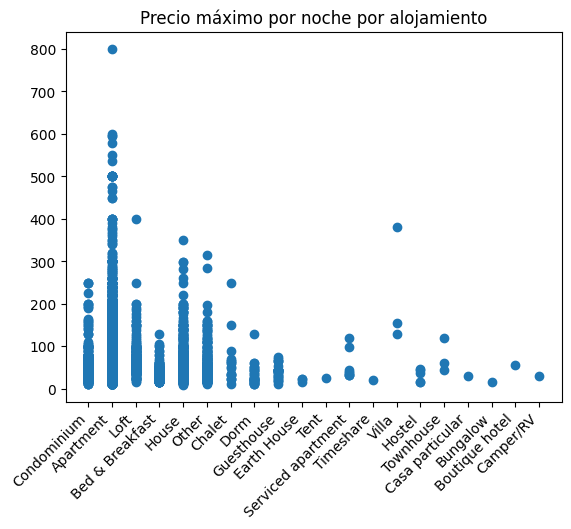

In [16]:
plt.scatter(df['Property Type'], df['Price'])
plt.xticks(rotation=45, ha='right')
plt.title('Precio máximo por noche por alojamiento')
plt.show()
#Esta es una visualización más acertada puesto que por ejemplo para el apartamento, vemos que el precio de 800 euros era un caso aislado
#lo mismo pasa con otros alojamientos como Villa, el cual tenía un caso puntual.

#### Precio por noche por localización

/var/folders/dp/3wz4p2396y7dbvtcqv838qz40000gn/T/ipykernel_3540/2506381727.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sort_values('Price',ascending=False, inplace=True)


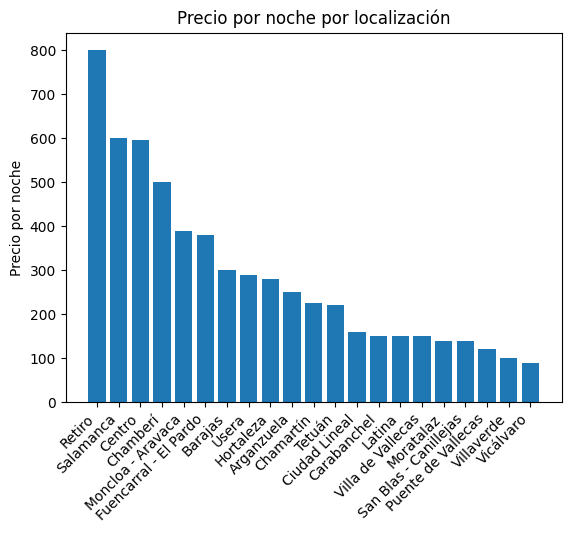

In [17]:
df.sort_values('Price',ascending=False, inplace=True)
plt.bar(df['Neighbourhood Group Cleansed'],df['Price'])
plt.xticks(rotation=45, ha='right')
plt.title('Precio por noche por localización')
plt.ylabel('Precio por noche')
plt.show()
#Sucede lo mismo que antes, esta visualización puede llevarnos a confusiones, así que será mas recomendable visualizar el precio medio


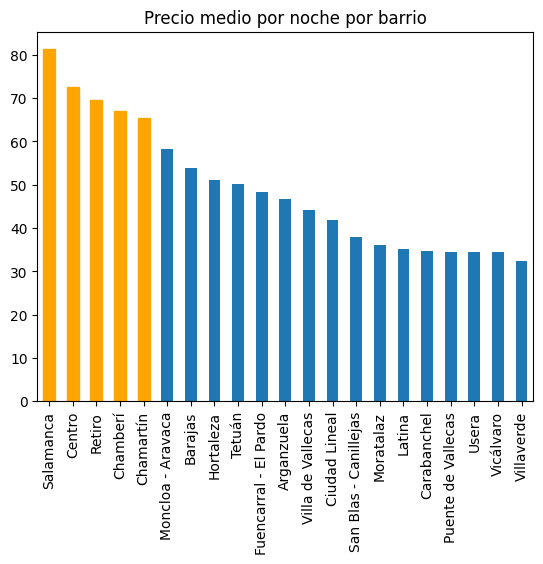

In [18]:
df.groupby(['Neighbourhood Group Cleansed'])['Price'].agg('mean').sort_values(ascending=False).plot(kind='bar')
plt.title('Precio medio por noche por barrio')
plt.xlabel('')
plt.gca().patches[:5]
for patch in plt.gca().patches[:5]:
	patch.set_color('orange')
#Esto es mucho más acertado ya que así tenemos el precio medio por noche dependiendo de su ubicación
#Como es lógico los precios más altos tienden a ser aquellos en zonas mas centricas como centro, salamanca, retiro, etc...
#mientras que los precios más baratos son de zonas más alejadas como villaverde, vicálvaro, etc...

<BarContainer object of 9 artists>

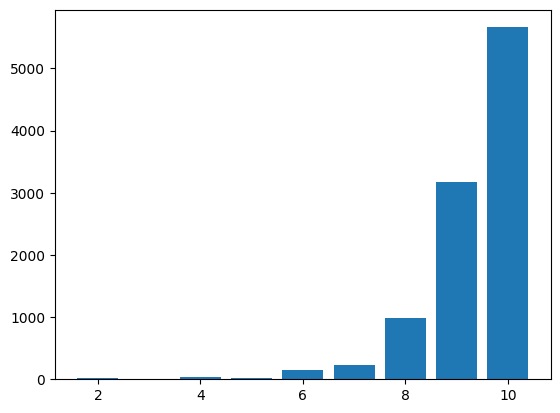

In [19]:
count_per_cleanliness = df['Review Scores Cleanliness'].value_counts()
plt.bar(count_per_cleanliness.index, count_per_cleanliness)
#Las valoraciones son muy positivas en general para los valores 9 y 10. Después hay un descenso considerable

<BarContainer object of 8 artists>

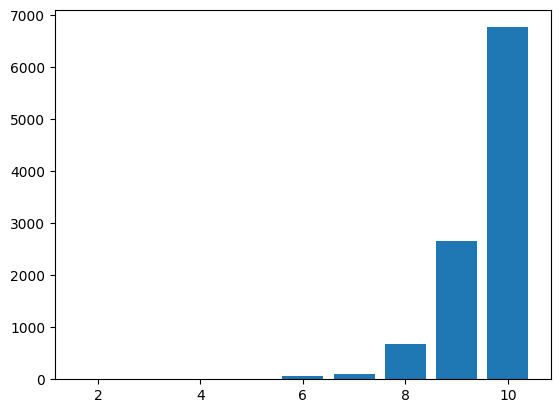

In [20]:
count_per_location = df['Review Scores Location'].value_counts()
plt.bar(count_per_location.index, count_per_location)
#Hago también un histograma de las reviews por la localización ya que suele ser algo que se valora mucho
#a la hora de alquilar un alojamiento.
#Y vemos que por lo general la mayoría tiene una review maxima de 10 puntos

#### Boxplot

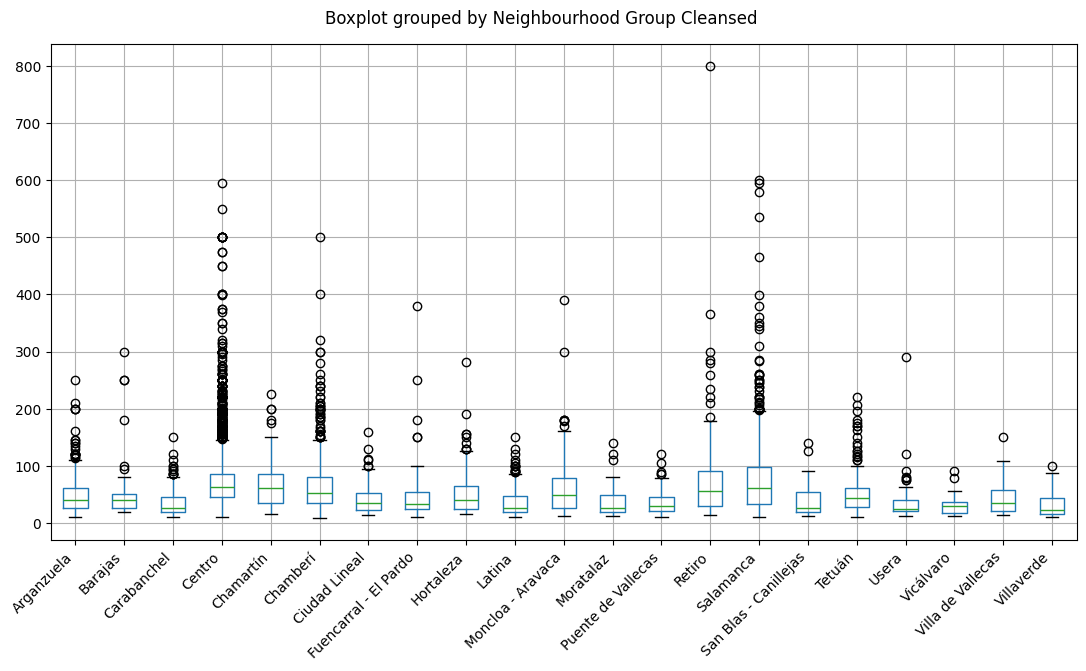

In [21]:
fig, ax = plt.subplots(figsize=(11, 7))

df.boxplot(column='Price', by='Neighbourhood Group Cleansed', ax=ax)
plt.xticks(rotation=45, ha='right')
ax.set_title('')
plt.tight_layout()
plt.xlabel('')
plt.show()

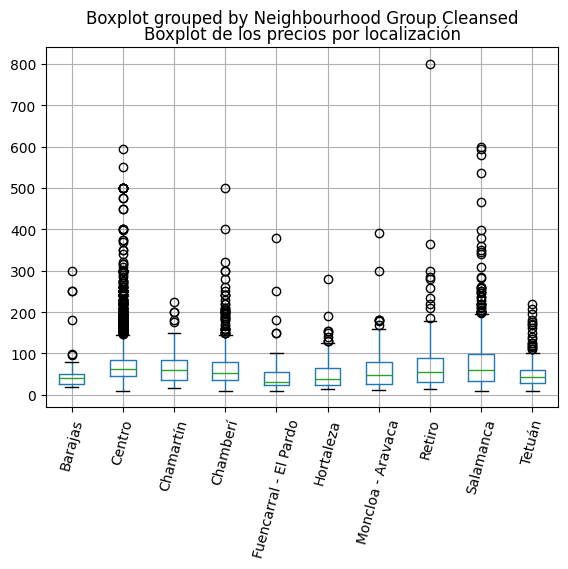

In [22]:
#Boxplot del top 10 precios mas altos por zona
mean_prices = df.groupby('Neighbourhood Group Cleansed')['Price'].mean()
top_5_Neighbourhood = mean_prices.nlargest(10).index
filtered_df = df[df['Neighbourhood Group Cleansed'].isin(top_5_Neighbourhood)]
filtered_df.boxplot(column='Price',by='Neighbourhood Group Cleansed')
plt.xticks(rotation=75)
plt.title('Boxplot de los precios por localización')
plt.xlabel('')
plt.show()
#

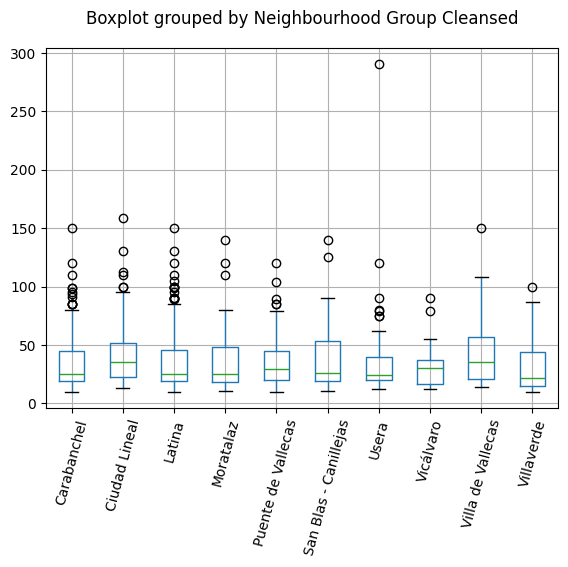

In [23]:
#Boxplot del top 10 precios más bajos por zona
mean_prices = df.groupby('Neighbourhood Group Cleansed')['Price'].mean()
top_5_Neighbourhood = mean_prices.nsmallest(10).index
filtered_df = df[df['Neighbourhood Group Cleansed'].isin(top_5_Neighbourhood)]
filtered_df.boxplot(column='Price',by='Neighbourhood Group Cleansed')
plt.xticks(rotation=75)
plt.title('')
plt.xlabel('')
plt.show()

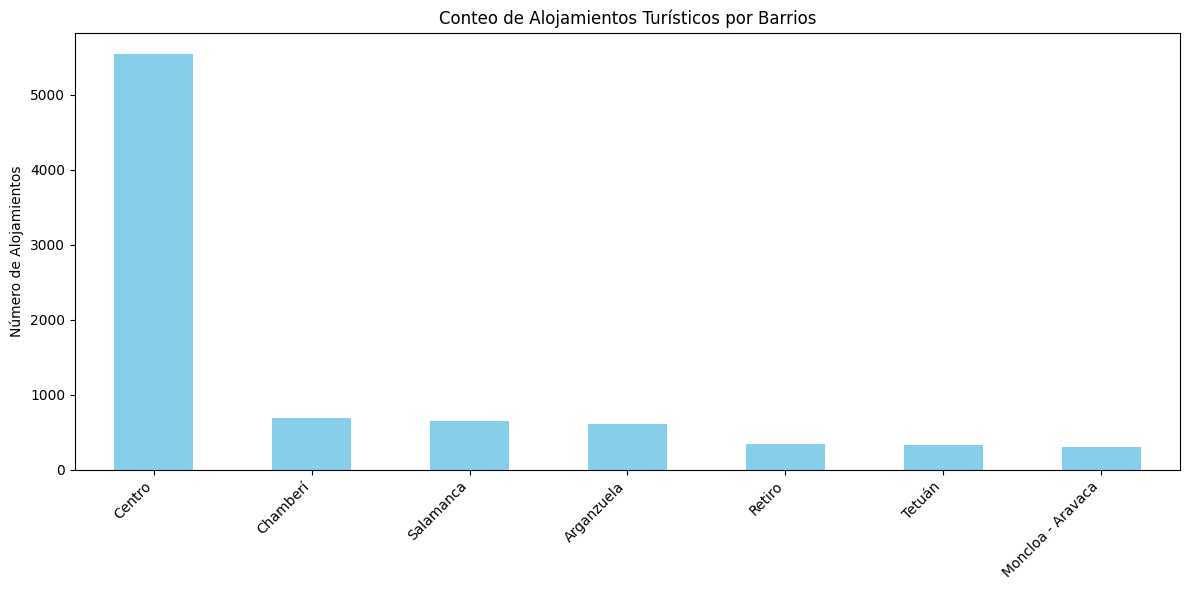

In [24]:
#Conteo de alojamientos por barrio
alojamientos_por_barrio = df['Neighbourhood Group Cleansed'].value_counts()
top_10_barrios = alojamientos_por_barrio.nlargest(7)

plt.figure(figsize=(12, 6)) 
top_10_barrios.plot(kind='bar', color='skyblue') 
plt.xlabel('')
plt.title('Conteo de Alojamientos Turísticos por Barrios')
plt.ylabel('Número de Alojamientos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### Cumulative Distribution Function (CDF)

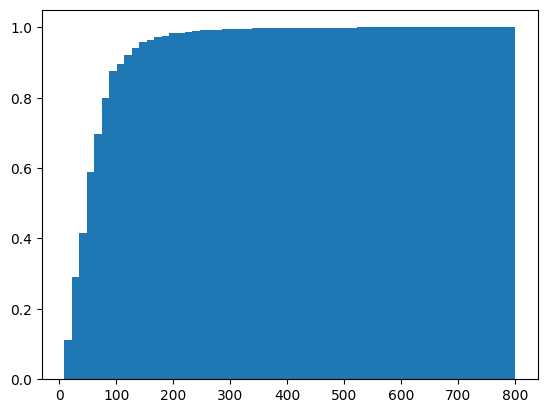

In [25]:
plt.hist(df['Price'], bins=60, cumulative=True, density=True)
plt.show()
#Analizando la grafica resultante, podría deducir que practicamente el 90% de los alojamientos no superan los 100 euros por noche

#### Regresión lineal

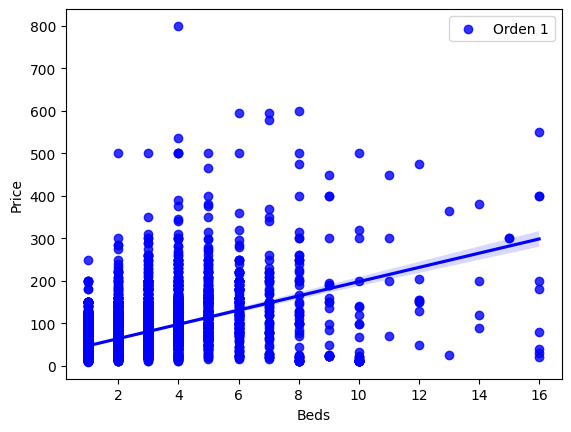

In [26]:
sns.regplot(data=df, x='Beds', y='Price',scatter=True, color='Blue',order=1, label='Orden 1')
plt.legend(loc='upper right')

#### Jointplot

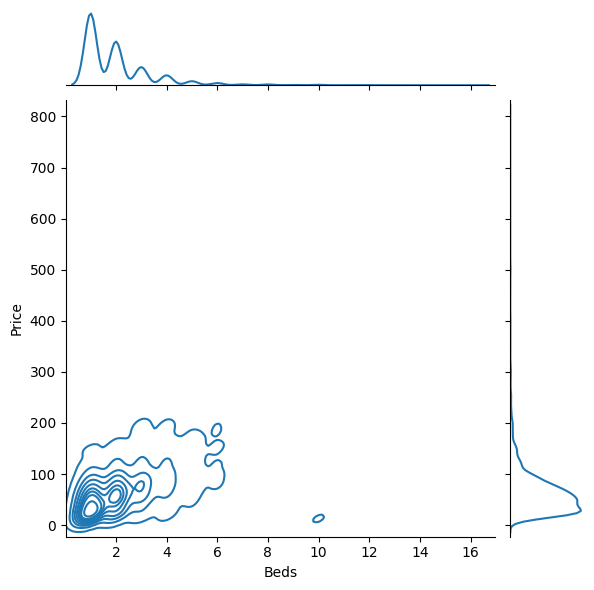

In [27]:
sns.jointplot(data=df, x='Beds', y='Price', kind='kde')
plt.show()

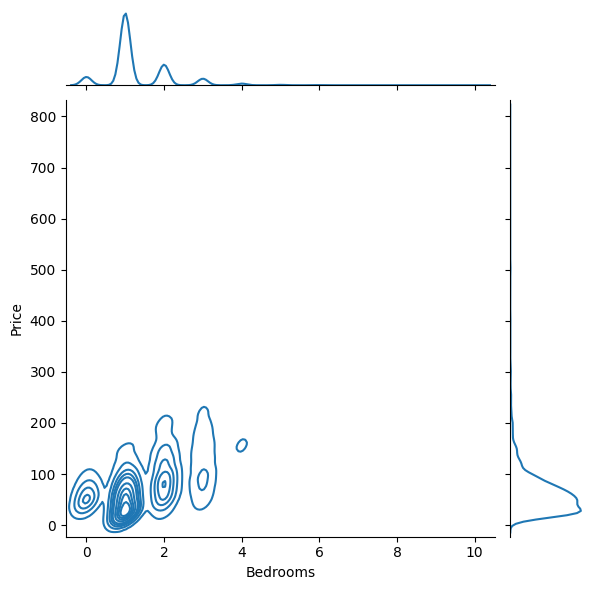

In [28]:
sns.jointplot(data=df, x='Bedrooms', y='Price', kind='kde')
plt.show()

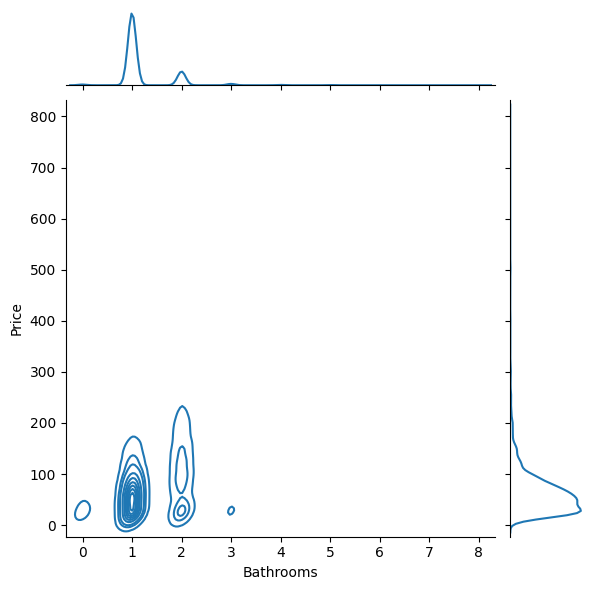

In [29]:
sns.jointplot(data=df, x='Bathrooms', y='Price', kind='kde')
plt.show()

#### Correlación con heatmap

In [30]:
df_aux = df[['Property Type','Accommodates','Bathrooms','Bedrooms','Beds','Price','Guests Included','Extra People']]

In [31]:
corr = df_aux.corr(numeric_only=True)

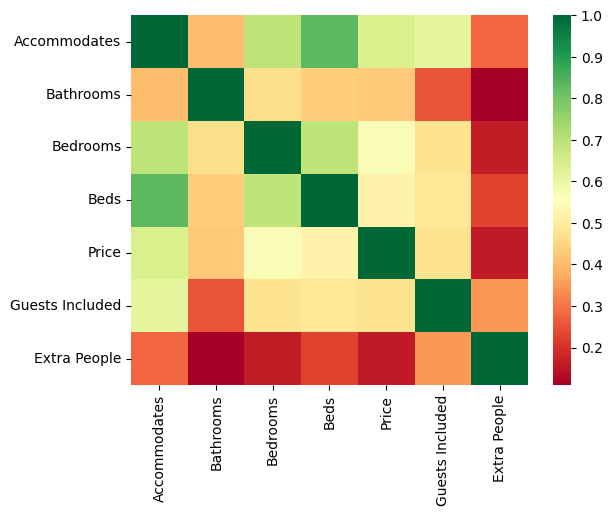

In [32]:
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, cmap='RdYlGn')
plt.show()

In [33]:
corr_salamanca = df_aux[df_aux['Property Type']=='Chalet'].corr(numeric_only=True)
corr_salamanca

,Accommodates,Bathrooms,Bedrooms,Beds,Price,Guests Included,Extra People
Accommodates,1.000000,0.483595,0.950178,0.709646,0.905024,0.935330,0.434127
Bathrooms,0.483595,1.000000,0.542326,0.764475,0.447749,0.516769,0.390370
Bedrooms,0.950178,0.542326,1.000000,0.607320,0.945964,0.905624,0.316255
Beds,0.709646,0.764475,0.607320,1.000000,0.516495,0.707957,0.469936
Price,0.905024,0.447749,0.945964,0.516495,1.000000,0.809866,0.308949
Guests Included,0.935330,0.516769,0.905624,0.707957,0.809866,1.000000,0.270148
Extra People,0.434127,0.390370,0.316255,0.469936,0.308949,0.270148,1.000000


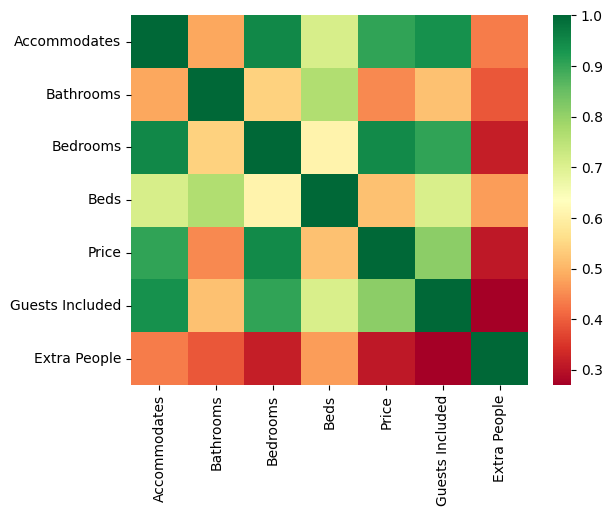

In [34]:
sns.heatmap(corr_salamanca,xticklabels=corr_salamanca.columns.values,yticklabels=corr_salamanca.columns.values, cmap='RdYlGn')
plt.show()

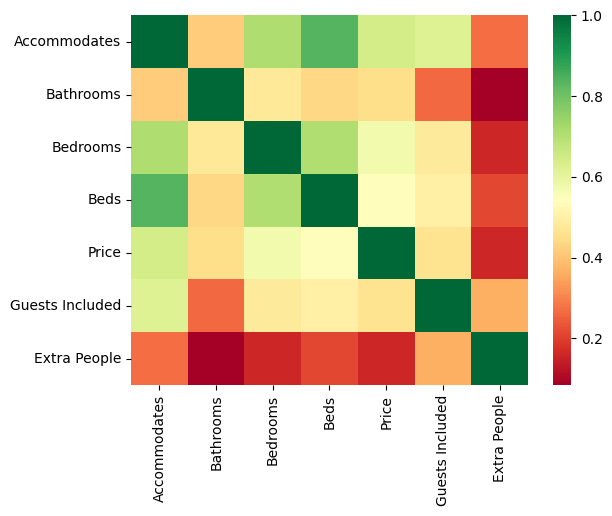

In [35]:
corr_apatment = df_aux[df_aux['Property Type']=='Apartment'].corr(numeric_only=True)
sns.heatmap(corr_apatment,xticklabels=corr_apatment.columns.values,yticklabels=corr_apatment.columns.values, cmap='RdYlGn')
plt.show()

#### Modelo de predicción

In [36]:
#df = df[df['Price']<150] #filtro para reducir outliers

In [37]:
X = df[['Bed Type','Beds','Bedrooms','Bathrooms','Property Type','Neighbourhood Group Cleansed']]
y = df['Price']

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
categorical_features = ['Bed Type','Property Type','Neighbourhood Group Cleansed']
numeric_features = ['Beds','Bedrooms','Bathrooms']

In [40]:
preprocessor = ColumnTransformer(
	transformers=[
		('num', StandardScaler(), numeric_features),
		('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
	]
)

In [41]:
final_model = RandomForestRegressor(n_estimators=50, max_depth=10,random_state=42)

In [42]:
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
						   ('model', final_model)])

pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Beds', 'Bedrooms',
                                                   'Bathrooms']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Bed Type', 'Property Type',
                                                   'Neighbourhood Group '
                                                   'Cleansed'])])),
                ('model',
                 RandomForestRegressor(max_depth=10, n_estimators=50,
                                       random_state=42))])

#### Random Forest

In [43]:
#Predicciones
y_pred_rf = pipeline.predict(X_test)

#MSE y R²
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Random Forest - RMSE: {rmse_rf:.2f}, R^2: {r2_rf:.2f}')

Random Forest - RMSE: 36.15, R^2: 0.55


#### Regresión Lineal

In [44]:
linear_model = LinearRegression()

In [45]:
linear_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', linear_model)])
linear_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Beds', 'Bedrooms',
                                                   'Bathrooms']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Bed Type', 'Property Type',
                                                   'Neighbourhood Group '
                                                   'Cleansed'])])),
                ('model', LinearRegression())])

In [46]:
y_pred_linear = linear_pipeline.predict(X_test)
rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred_linear))
r2_linear = r2_score(y_test, y_pred_linear)
print(f'Regresión Lineal - RMSE: {rmse_linear:.2f}, R^2: {r2_linear:.2f}')

Regresión Lineal - RMSE: 39.45, R^2: 0.46


#### Support Vector Regression (SVR)

In [47]:
svr_model = SVR(kernel='rbf', C=100, gamma=0.1)

In [48]:
svr_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', svr_model)])
svr_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Beds', 'Bedrooms',
                                                   'Bathrooms']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Bed Type', 'Property Type',
                                                   'Neighbourhood Group '
                                                   'Cleansed'])])),
                ('model', SVR(C=100, gamma=0.1))])

In [49]:
y_pred_svr = svr_pipeline.predict(X_test)
rmse_svr = np.sqrt(mean_squared_error(y_test, y_pred_svr))
r2_svr = r2_score(y_test, y_pred_svr)
print(f'SVR - RMSE: {rmse_svr:.2f}, R^2: {r2_svr:.2f}')

SVR - RMSE: 36.56, R^2: 0.54


#### Gradient Boosting Regressor

In [50]:
gb_model = GradientBoostingRegressor(n_estimators=100, max_depth=3, random_state=42)

In [51]:
gb_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', gb_model)])
gb_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Beds', 'Bedrooms',
                                                   'Bathrooms']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Bed Type', 'Property Type',
                                                   'Neighbourhood Group '
                                                   'Cleansed'])])),
                ('model', GradientBoostingRegressor(random_state=42))])

In [52]:
y_pred_gb = gb_pipeline.predict(X_test)
rmse_gb = np.sqrt(mean_squared_error(y_test, y_pred_gb))
r2_gb = r2_score(y_test, y_pred_gb)
print(f'Gradient Boosting - RMSE: {rmse_gb:.2f}, R^2: {r2_gb:.2f}')

Gradient Boosting - RMSE: 35.53, R^2: 0.57


#### Predicción

In [53]:
def predecir_precio(bed_type: str, property_type: str, neighbourhood_group_cleansed: str, beds: int, bedrooms: int, bathrooms: int, pipeline) -> float:
    
    data = {
        'Bed Type': [bed_type],
        'Property Type': [property_type],
        'Neighbourhood Group Cleansed': [neighbourhood_group_cleansed],
        'Beds': [beds],
        'Bedrooms': [bedrooms],
        'Bathrooms': [bathrooms]
    }
    input_df = pd.DataFrame(data)
        
    try:
        prediccion = pipeline.predict(input_df)
        return prediccion[0]
    except Exception as e:
        print(f'Error en la predicción: {e}')
        return None

precio_predicho = predecir_precio('Real Bed', 'Apartment', 'Villaverde', 1, 1, 1, gb_pipeline)
if precio_predicho is not None:
    print(f'El precio por noche es: {precio_predicho:.2f}')
else:
    print('No se pudo predecir el precio debido a un error.')


El precio por noche es: 29.65
